# Kuramoto-Shinomoto-Sakaguchi MV-SDE

In primis importiamo i pacchetti necessari per usare le funzioni matematiche in python.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time

Scriviamo la MV-SDE relativa al modello di Kuramoto-Shninomoto-Sakaguchi:

$$ dX_t = \left( \mathbb{E}[sen(X_t)] cos(X_t) - \mathbb{E}[cos(X_t)]sen(X_t) \right) dt + \sigma dW_t , \ \ \ X_0=x_0. $$

Da questa equazione differenziale si evince che:
* K = 3, d = 1 e q = 1,
* $\varphi(x)=(1, senx, cosx)$, 
* $\alpha(t,x)=(0, cosx, -senx)^T$, 
* $\beta(t,x)=(\sigma, 0, 0)^T$.

Siamo pronti per definire la prima funzione che applica il Metodo di Eulero a un vettore X preso in input, assieme alle costanti $c_1$ e $c_2$, il valore della parte diffusiva $\sigma$ , il numero di simulazioni M e il valore dello step temporale h.
<a id="eulero"></a>

In [2]:
def eulero(c1, c2, sigma, h, M, X):
    W = np.random.normal(0, 1, M) 
    drift = c1 * np.cos(X) - c2 * np.sin(X) 
    diffusione = sigma 
    X = X + drift * h + diffusione * math.sqrt(h) * W 
    
    return X

Ora definiamo la funzione che calcola la media degli M valori di un vettore preso in input. 
<a id="average"></a>

In [3]:
def average(Y):
    num = Y.size
    X = sum(Y) / num
    return X

Scriviamo la funzione pricipale che implementa il metodo Monte Carlo. Essa calcola il valore h di ogni step e il vettore di valori iniziali, dopodichè richiama ciclicamente il Metodo di Eulero sopra definito, per ogni step temporale.
<a id="montecarlo"></a>

In [4]:
def monte_carlo(c1, c2, a1, a2, sigma, T, N, M, X0):
    h = T / N
    X = X0 * np.ones(M)
    gamma1 = [average(np.sin(X))]
    gamma2 = [average(np.cos(X))]
    
    for i in range(N):
        X = eulero(c1 + a1 * gamma1[-1], c2 + a2 * gamma2[-1], sigma, h, M, X)
        gamma1.append(average(np.sin(X)))
        gamma2.append(average(np.cos(X)))
    
    return X, np.array(gamma1), np.array(gamma2) 

Scriviamo la stessa funzione nel caso in cui trattiamo SDEs Markoviane. La funzione precedente è costriuita in modo da poter essere applicata anche a questo tipo di SDES oltre che a quelle di McKean-Vlasov. La ridefiniamo comunque per poter emettere i calcoli e le allocazioni in memoria di gamma1 e gamma2 (superflui in questo caso) cosicché pssiamo ridurre il tempo di esecuzione del metodo.

In [5]:
def monte_carlo_ridotto(c1, c2, sigma, T, N, M, X0):
    h = T / N
    X = X0 * np.ones(M)
    
    for i in range(N):
        X = eulero(c1, c2, sigma, h, M, X)
    
    return X

Concludiamo riportando il main che richiama le funzioni sopra definite. Ricordiamo a cosa corrisponderanno i valori che daremo in input alle funzioni che richiameremo:
* N : numero di iterazioni (steps temporali),
* M : numero di simulazioni in ogni istante,
* T : istante finale,
* $\mu$ : funzione di Drift,
* $\sigma$ : funzione di Diffuzione,
* h : step temporale,
* $X_0$ : dato iniziale.

Precisiamo anche il ruolo che le quattro costanti $c_1, \  c_2, \ a_1$ e $a_2$ hanno all'interno del programma. Esse infatti servono per rendere il metodo applicabile sia al caso di MV-SDE che a quello di SDE Markoviane. Infatti i coefficienti $a_1$ e $a_2$ possono annullare il contributo dipendente dal valore atteso,  all'interno dell'equazione.
<a id="main"></a>

In [6]:
if __name__ == "__main__":
    
    # Parametri in Input
    c1 = 0
    c2 = 0
    a1 = 1
    a2 = 1
    
    sigma = 0.5
    
    T = 1
    N = 100
    M = 100000
    X0 = 0.5
    
    start = time.process_time()   # parte il cronometro
    X, gamma1, gamma2 = monte_carlo(c1, c2, a1, a2, sigma, T, N, M, X0)
    end = time.process_time()   # si ferma il cronometro
    
    print("Tempo di esecuzione: ", end - start)

Tempo di esecuzione:  5.96875


In [7]:
print("XT = ", X)
# print(" XT = ", X[1:6], "...", X[-6:-1])

XT =  [0.97922378 0.54103943 0.78330638 ... 0.74236202 0.55520101 0.60249939]


In [8]:
# print("E[sen(X)] = ", gamma1)
print(" E[sen(X)] = ", gamma1[1:4], "...", gamma1[-4:-1])

 E[sen(X)] =  [0.47865126 0.4781214  0.47774168] ... [0.45361605 0.45350633 0.4533627 ]


In [9]:
# print("E[cos(X)] = ", gamma2)
print(" E[cos(X) = ", gamma2[1:4], "...", gamma2[-4:-1])

 E[cos(X) =  [0.87656521 0.87544426 0.87429518] ... [0.82806405 0.82789229 0.82766809]


Grafico di $\mathbb{E}[sen(X)]$.

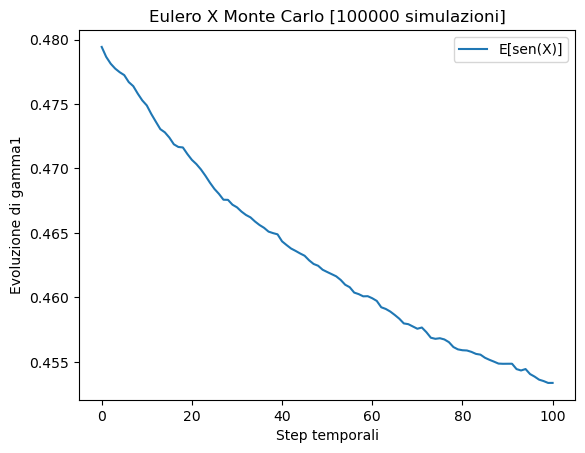

In [10]:
fig = plt.figure() 
plt.title("Eulero X Monte Carlo [" + str(M) + " simulazioni]") 
plt.xlabel("Step temporali") 
plt.ylabel("Evoluzione di gamma1") 
# plt.ylim(-1,1) # se non c'è il grafico è molto zoomato
plt.plot(gamma1, label='E[sen(X)]')
plt.legend()
plt.show()

Grafico di $\mathbb{E}[cos(X)]$.

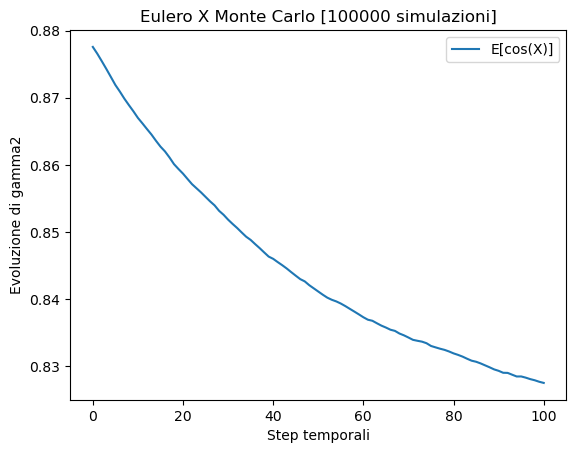

In [11]:
fig = plt.figure() 
plt.title("Eulero X Monte Carlo [" + str(M) + " simulazioni]") 
plt.xlabel("Step temporali") 
plt.ylabel("Evoluzione di gamma2") 
# plt.ylim(-1,1) # se non c'è il grafico è molto zoomato
plt.plot(gamma2, label='E[cos(X)]')
plt.legend()
plt.show()

OSSERVAZIONI: con M più piccolo di 1 mln il grafico dei valori attesi ha un grandissimo errore relativo (ma molto piccolo quello assoluto). In particolare i grafico del seno è tutto rumore quando il dato iniziale è 0. Infine con N = 100  si hanno dei tempi accettabili però i grafici sono un poco grezzi.

[Vai alla funzione eulero](#eulero)

[Vai alla funzione average](#average)

[Vai alla funzione monte carlo](#montecarlo)

[Vai al main](#main)